In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

In [20]:
blue_max = 630
red_max = 505
yellow_max = 429

blue_mass = 791.84
red_mass = 496.42
yellow_mass = 534.30

blue_eps = 1.05E5
red_eps = 2.50E4
yellow_eps = 2.12E4

def calc_mass(lr, absorbance, color, serving_size = 100):
    #Calculates the mass of the specified dye in a single serving
    #Requires the linear regression to have already been performed
    #Args:
        # lr: The linear regression model used to calibrate
        # Absorbance: a unitless reading from spectrophotometer
        # Color: a string of 'red', 'blue', or 'yellow'
        # Serving size: milliliters per serving of sample
              
    concentration = absorbance / lr.coef_[0]
    if color == 'blue':
        mass = serving_size * concentration * blue_mass 
        return(f'The mass of Blue 1 is {round(mass, 2)} mg.')
    elif color == 'red':
        mass = serving_size * concentration * red_mass
        return(f'The mass of Red 40 is {round(mass, 2)} mg.')
    else:
        mass = serving_size * concentration * yellow_mass
        return(f'The mass of Yellow 5 is {round(mass, 2)} mg.')
    

The Kool-Aid Bursts (Cherry, Grape, and Fruit Punch), Gatorade Fruit Punch, Gatorade Tropical Cooler, Hawaiian Punch, the Powerades (Blackberry, Mountain Berry, Lemon Lime, and Fruit Punch), the powdered Kool Aids (Grape and Tropical Punch), and the Nyquil had an absorbance too high for the spectrophotometer to measure. This absorbance was lowered by performing a 25-fold dilution on the Kool Aid Bursts (Cherry, Grape, and Fruit Punch), the G2 Fruit Punch, the Hawaiian Punch, the powdered Kool Aids (Tropical Punch and Grape), two Powerades (Blackberry and Fruit Punch), and the Nyquil. A 12.5-fold dilution was performed on the remaining Powerades (Lemon Lime and Mountain Berry Blast), and Gatorade Tropical Cooler. 

# Blue 1

In [21]:
blue = pd.read_csv('CSVs/Calibration/Blue 1 Calibration Curve for Pandas.csv')

In [22]:
blue = blue[['Wavelength (nm)', 'Abs', 'Concentration']]

In [23]:
blue['Wavelength (nm)'] = blue['Wavelength (nm)'].round(0)

In [24]:
blue_cal_df = blue[blue['Wavelength (nm)'] == blue_max]

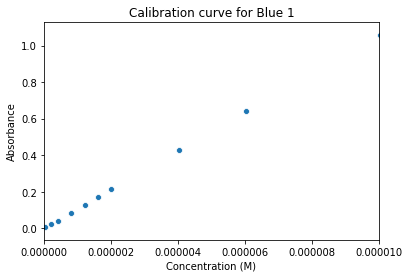

In [25]:
sns.scatterplot(data = blue_cal_df, x = 'Concentration', y = 'Abs')
plt.xlim(0, 1E-5)
plt.xlabel('Concentration (M)')
plt.ylabel('Absorbance')
plt.title('Calibration curve for Blue 1')
plt.show()

In [26]:
X_blue = np.array(blue_cal_df['Concentration']).reshape(-1, 1)
y_blue = blue_cal_df['Abs']
lr_blue = LinearRegression()
lr_blue.fit(X_blue, y_blue)
print(f'The R-Squared value for the Blue 1 calibration curve is {round(lr_blue.score(X_blue, y_blue), 5)}')

The R-Squared value for the Blue 1 calibration curve is 0.99998


# Red 40

In [27]:
red = pd.read_csv('CSVs/Calibration/Red Calibration Curve for Pandas.csv')

In [28]:
red['Wavelength'] =red['Wavelength'].round(0)

In [29]:
red_cal_df = red[red['Wavelength'] == red_max]
red_cal_df

,Wavelength,Abs,Concentration
59,505.0,1.030879,3.990000e-05
180,505.0,0.506138,2.000000e-05
301,505.0,1.506775,5.990000e-05
422,505.0,1.232016,4.790000e-05
543,505.0,1.984208,7.990000e-05
664,505.0,0.097510,4.000000e-06
785,505.0,0.000936,3.990000e-09
906,505.0,0.208014,8.000000e-06
1027,505.0,0.417237,1.600000e-05


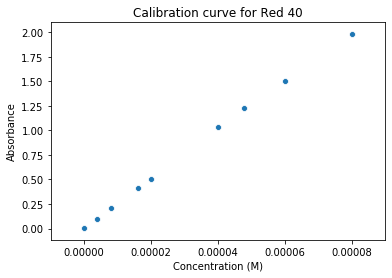

In [30]:
sns.scatterplot(data = red_cal_df, x = 'Concentration', y = 'Abs')
plt.xlim(-0.00001, 9E-5)
plt.xlabel('Concentration (M)')
plt.ylabel('Absorbance')
plt.title('Calibration curve for Red 40')
plt.show()

In [31]:
X_red = np.array(red_cal_df['Concentration']).reshape(-1, 1)
y_red = red_cal_df['Abs']
lr_red = LinearRegression()
lr_red.fit(X_red, y_red)
print(f'The R-Squared value for the Red 40 calibration curve is {round(lr_red.score(X_red, y_red), 5)}')

The R-Squared value for the Red 40 calibration curve is 0.99948


# Yellow 5

In [32]:
yellow = pd.read_csv('CSVs/Calibration/Yellow Calibration Curve for Pandas.csv')

In [33]:
yellow['Wavelength (nm)'] = yellow['Wavelength (nm)'].round(0)

In [34]:
yellow_cal_df = yellow[yellow['Wavelength (nm)'] == yellow_max]

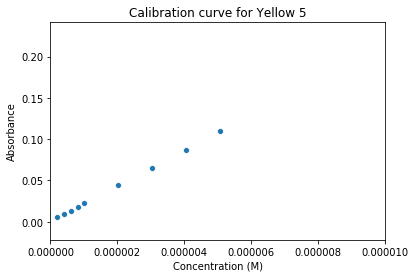

In [35]:
sns.scatterplot(data = yellow_cal_df, x = 'Concentration', y = 'Abs')
plt.xlim(0, 1E-5)
plt.xlabel('Concentration (M)')
plt.ylabel('Absorbance')
plt.title('Calibration curve for Yellow 5')
plt.show()

In [36]:
X_yellow = np.array(yellow_cal_df['Concentration']).reshape(-1, 1)
y_yellow = yellow_cal_df['Abs']
lr_yellow = LinearRegression()
lr_yellow.fit(X_yellow, y_yellow)
print(f'The R-Squared value for the Yellow 5 calibration curve is {round(lr_yellow.score(X_yellow, y_yellow), 5)}')

The R-Squared value for the Yellow 5 calibration curve is 0.99991
